In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from hdf5storage import loadmat
import h5py

In [2]:

mat_file_path = f'data/CC182-1028/CC182_241028_Combined_dFFdotMeanValues.mat'
mat_file_path = f'data/CC185-1026/CC185_241026_Combined_dFFdotMeanValues.mat'
mat_file_path = f'data/CC185-1025/CC185_241025_Combined_dFFdotMeanValues.mat'

with h5py.File(mat_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset
    data = f['dFFdotMeanValues']
    
    # Check the shape of the dataset
    N_STIMS, N_SESSIONS  = data.shape
    N_NEURONS, N_REPS = f[data[0, 0]].shape
    print(f'{N_STIMS=}, {N_SESSIONS=}, {N_NEURONS=}, {N_REPS=}')

    X = np.reshape([np.asarray(f[data[stim_i, session_i]]).T for stim_i in range(N_STIMS) for session_i in range(N_SESSIONS)],
                   (N_SESSIONS*N_STIMS*N_REPS, -1))
    
stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS)).ravel()

N_STIMS=48, N_SESSIONS=4, N_NEURONS=84, N_REPS=10


In [6]:
X.shape (# trials, # neurons)

(1920, 48)

In [4]:
# rearranging to have 96 stims instead of 48
inst0_sessions = [0,1]
inst1_sessions = [2,3]
with h5py.File(mat_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset 
    data = f['dFFdotMeanValues']
    
    # Check the shape of the dataset
    N_STIMS, N_SESSIONS  = data.shape
    N_NEURONS, N_REPS = f[data[0, 0]].shape
    X_inst0 = np.reshape([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst0_sessions] 
                          for stim_i in range(N_STIMS)], (N_STIMS, 2 * N_REPS, N_NEURONS))
    X_inst1 = np.reshape([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst1_sessions] 
                          for stim_i in range(N_STIMS)], (N_STIMS, 2 * N_REPS, N_NEURONS))
    X = np.concatenate([X_inst0, X_inst1]).reshape(2*N_STIMS * N_SESSIONS//2 * N_REPS, -1) (# trials , # neurons)

N_STIMS = 2 * N_STIMS
N_SESSIONS = N_SESSIONS // 2
stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS)).ravel()

Text(0.5, 0, 'PC')

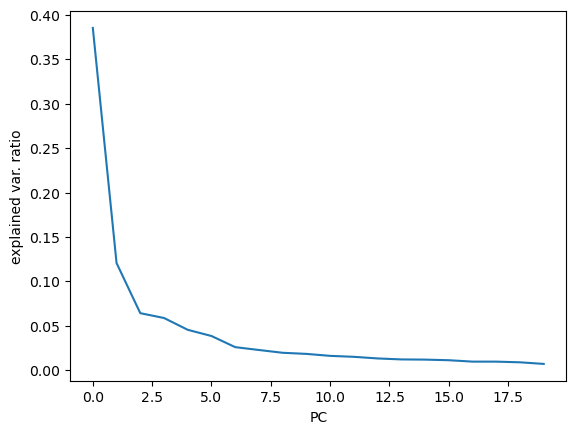

In [166]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(20)
Y = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('explained var. ratio')
plt.xlabel('PC')

In [120]:
with open('movie_2024_10_23/stim_frames_global.txt', 'r') as f:
    ls = f.readlines()[1:]
stim_info = [[i]+l.split() for i,l in enumerate(ls)]

stim_idxs = {}
stim_dirs = {}
for i, frame, stimname in stim_info:
    stim_root = stimname.split('_dir')[0]
    stim_idxs[stim_root] = stim_idxs.get(stim_root, []) + [i]
    
stim_idxs

{'-3dotD2': [0, 7, 17, 22, 27, 35, 39, 47, 51, 58, 60, 67, 77, 81, 89, 93],
 'gratW12.5': [1, 9, 15, 23, 25, 33, 41, 45, 48, 55, 62, 68, 72, 79, 87, 95],
 'gratW2': [2, 8, 16, 18, 28, 30, 37, 44, 53, 57, 65, 70, 75, 82, 84, 91],
 '-1dotD2': [3, 11, 12, 19, 29, 34, 36, 43, 49, 56, 64, 66, 76, 78, 85, 92],
 '+1dotD2': [4, 6, 13, 21, 26, 32, 40, 42, 52, 54, 61, 69, 74, 83, 88, 90],
 '+3dotD2': [5, 10, 14, 20, 24, 31, 38, 46, 50, 59, 63, 71, 73, 80, 86, 94]}

In [ ]:
significant bouton file
- rows: neurons
- cols: 1st col: significance of responses 

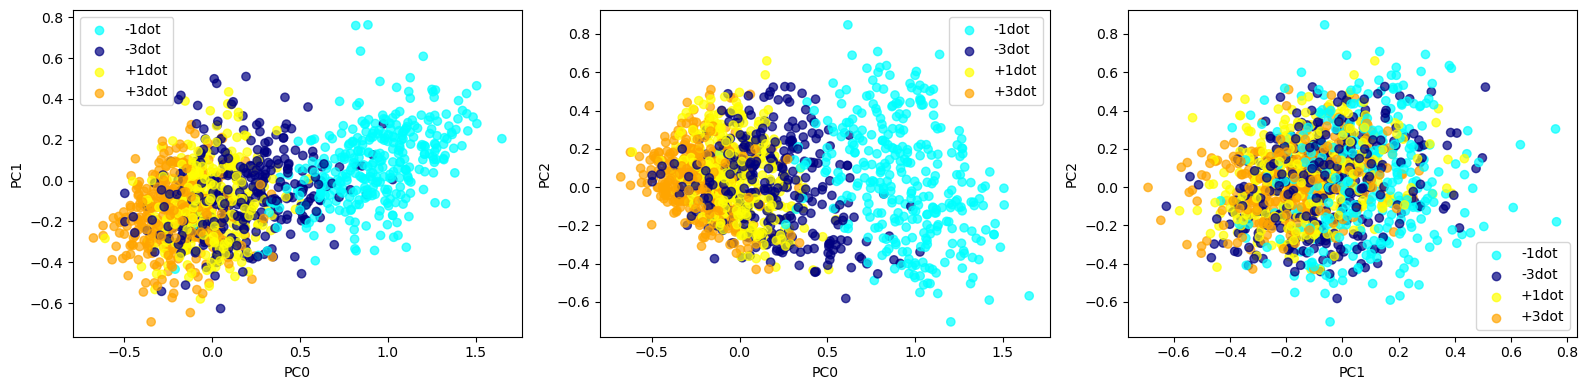

In [163]:
### - FLOWS vs + FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['-1dotD2']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['-3dotD2']:
    c[(stimulus_labels == i)] = 2
for i in stim_idxs['+1dotD2']:
    c[(stimulus_labels == i)] = 3
for i in stim_idxs['+3dotD2']:
    c[(stimulus_labels == i)] = 4


colors = ['cyan','navy','yellow','orange']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i-1] for i in c if i > 0]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-1dot'), (2, .7, '-3dot'), 
                                                (3, .7, '+1dot'), (4, .7, '+3dot')]):
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[c > 0][:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

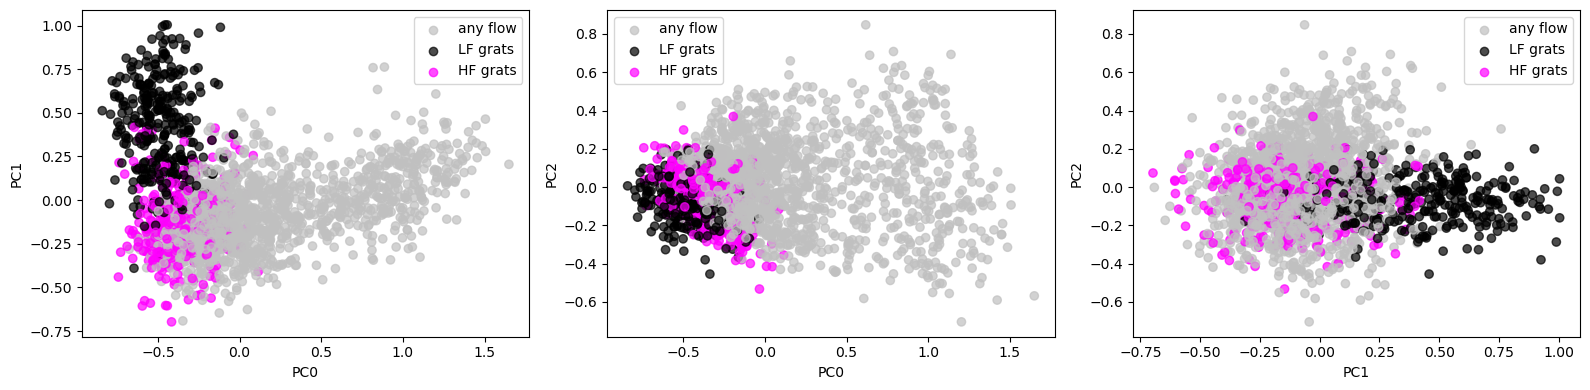

In [157]:
### GRATINGS vs. FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['gratW12.5']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['gratW2']:
    c[(stimulus_labels == i)] = 2




colors = ['silver','black','magenta']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i] for i in c]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(0, .7, 'any flow'), (1, .7, 'LF grats'), (2, .7, 'HF grats')]):
        #ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    

f.tight_layout()
plt.show()

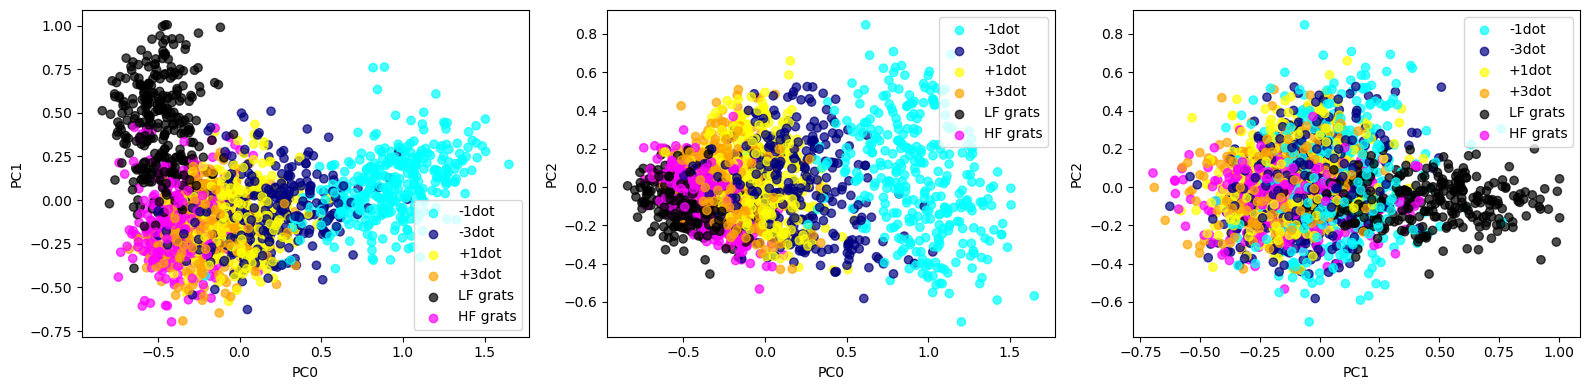

In [158]:
### GRATINGS vs. FLOWS

PCs = [(0,1), (0,2), (1,2)]


c = np.zeros_like(stimulus_labels)

for i in stim_idxs['-1dotD2']:
    c[(stimulus_labels == i)] = 1
for i in stim_idxs['-3dotD2']:
    c[(stimulus_labels == i)] = 2
for i in stim_idxs['+1dotD2']:
    c[(stimulus_labels == i)] = 3
for i in stim_idxs['+3dotD2']:
    c[(stimulus_labels == i)] = 4
for i in stim_idxs['gratW12.5']:
    c[(stimulus_labels == i)] = 5
for i in stim_idxs['gratW2']:
    c[(stimulus_labels == i)] = 6




colors = ['cyan','navy','yellow','orange'] + ['black','magenta']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))
cs = [colors[i-1] for i in c]
for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-1dot'), (2, .7, '-3dot'), 
                                                (3, .7, '+1dot'), (4, .7, '+3dot'),
                                                (5, .7, 'LF grats'), (6, .7, 'HF grats')]):
        #ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name, ec=colors[i])
        sc = ax.scatter(*Y[c==lbl][:1][:,pcs].T, color=colors[i], alpha=.7, label=lbl_name)
    sc = ax.scatter(*Y[:,pcs].T, c=cs, alpha=.7)#, label=lbl_name)
    ax.legend()
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    

f.tight_layout()
plt.show()

In [ ]:
# ### GRATING DIRECTIONS

# PCs = [(0,1), (0,2), (1,2)]

# labels_to_use = stimulus_labels
# gratings_vs_flows = np.zeros_like(stimulus_labels)
# gratings_vs_flows[(stimulus_labels == 6) | (stimulus_labels == 11) | (stimulus_labels == 19) | (stimulus_labels == 31)] = 1

# gratings_dirs = np.zeros_like(stimulus_labels)
# gratings_dirs[(stimulus_labels == 6)] = 1
# gratings_dirs[(stimulus_labels == 11)] = 2
# gratings_dirs[(stimulus_labels == 19)] = 3
# gratings_dirs[(stimulus_labels == 31)] = 4
# gratings_dirs = gratings_dirs[gratings_vs_flows > 0]



# f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

# for ax, pcs in zip(axes, PCs):
#     ax.scatter(*Y[gratings_vs_flows > 0][:,pcs].T, c=gratings_dirs, cmap='tab10')
#     ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
# f.tight_layout()
# plt.show()

### Encoding

In [13]:

inst0_sessions = [0,1]
inst1_sessions = [2,3]

traces_file_paths = [
    'data/CC185-1025/CC185_241025_Combined_dFFdotTraces.mat',
                   'data/CC185-1026/CC185_241026_Combined_dFFdotTraces.mat',
                    'data/CC182-1028/CC182_241028_Combined_dFFdotTraces.mat']
X = None
for traces_file_path in traces_file_paths:
    print(traces_file_path,flush=True)
    with h5py.File(traces_file_path, 'r') as f:
        # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
        data = f['dFFdotTraces']
    #     data_0 = np.asarray(f[data[si,session_i])
        N_STIMS, N_SESSIONS  = data.shape
        N_REPS, N_NEURONS, TRIAL_LEN = f[data[0, 0]].shape

        X_inst0 = np.reshape(np.moveaxis([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst0_sessions] 
                              for stim_i in range(N_STIMS)], 4, 2), (N_STIMS, 2 * N_REPS, TRIAL_LEN, N_NEURONS))

        X_inst1 = np.reshape(np.moveaxis([[np.asarray(f[data[stim_i, session_i]]).T for session_i in inst1_sessions] 
                              for stim_i in range(N_STIMS)], 4, 2), (N_STIMS, 2 * N_REPS, TRIAL_LEN, N_NEURONS))

        expX = np.concatenate([X_inst0, X_inst1]).mean(1)#.reshape(2*N_STIMS * N_SESSIONS//2 * N_REPS, TRIAL_LEN, N_NEURONS)


    expX = np.moveaxis(expX,-1,0)
    if X is None:
        X = expX
    else:
        X = np.concatenate([X, expX])
X.shape # (N_NEURONS, N_STIMS, TRIAL_LEN)

data/CC185-1025/CC185_241025_Combined_dFFdotTraces.mat
data/CC185-1026/CC185_241026_Combined_dFFdotTraces.mat
data/CC182-1028/CC182_241028_Combined_dFFdotTraces.mat


(225, 96, 85)

In [14]:
with open('movie_2024_10_23/stim_frames_global.txt', 'r') as f:
    ls = f.readlines()[1:]
stim_info = [[i]+l.split() for i,l in enumerate(ls)]

stim_idxs = {}
stim_dirs = {}
for i, frame, stimname in stim_info:
    stim_root, stim_dir = stimname.split('_dir')
    stim_idxs[stim_root] = stim_idxs.get(stim_root, []) + [(i, stim_dir)]
    
print(stim_idxs)

{'-3dotD2': [(0, '45'), (7, '315'), (17, '180'), (22, '135'), (27, '0'), (35, '270'), (39, '225'), (47, '90'), (51, '90'), (58, '225'), (60, '0'), (67, '45'), (77, '315'), (81, '180'), (89, '270'), (93, '135')], 'gratW12.5': [(1, '90'), (9, '0'), (15, '225'), (23, '180'), (25, '135'), (33, '270'), (41, '45'), (45, '315'), (48, '90'), (55, '315'), (62, '180'), (68, '45'), (72, '225'), (79, '135'), (87, '270'), (95, '0')], 'gratW2': [(2, '45'), (8, '270'), (16, '90'), (18, '0'), (28, '225'), (30, '135'), (37, '180'), (44, '315'), (53, '90'), (57, '0'), (65, '45'), (70, '315'), (75, '180'), (82, '270'), (84, '135'), (91, '225')], '-1dotD2': [(3, '270'), (11, '45'), (12, '0'), (19, '135'), (29, '180'), (34, '225'), (36, '315'), (43, '90'), (49, '45'), (56, '225'), (64, '180'), (66, '315'), (76, '135'), (78, '270'), (85, '90'), (92, '0')], '+1dotD2': [(4, '135'), (6, '45'), (13, '0'), (21, '315'), (26, '180'), (32, '225'), (40, '270'), (42, '90'), (52, '315'), (54, '270'), (61, '45'), (69, 

In [21]:
# Now, need to put together the different directions into the same 2-D PSTH
tensorX = []
nonNeg = True # make stims traces non-negative relative to each neuron
start_crop = 30# how many initial bins to skip (prestimulus interval)
end_crop = 25
dirs = np.arange(0,360,45)
stimnames = ['gratW12.5', 'gratW2',
            '-1dotD2', '-3dotD2',
            '+1dotD2', '+3dotD2']
relFRs = []
for ni in range(X.shape[0]):
    
    neuron_traces = []
    relMeanPosFRs = []
    
    for stimname in stimnames:

        trace2d = []

        for d in dirs:
            stim_ixs = [i for i,j in stim_idxs[stimname] if j == str(d)]

            dir_trace = X[ni, stim_ixs].mean(0)
            
            #trim
            dir_trace = dir_trace[start_crop:]
            if end_crop > 0:
                dir_trace = dir_trace[:-end_crop]

            #append 1d trace for this direction to the full 2d response map
            trace2d.append(dir_trace)
        relMeanPosFRs.append(max(np.mean(trace2d,axis=1))) # use mean FR for best direction
        neuron_traces.append(np.reshape(trace2d, (-1,), order='F'))
    neuron_traces = np.array(neuron_traces)
    relMeanPosFRs = np.array(relMeanPosFRs)
    if nonNeg:
        neuron_traces -= neuron_traces.min()
        relMeanPosFRs -= neuron_traces.min()
    tensorX.append(neuron_traces)
    relFRs.append(relMeanPosFRs)
tensorX = np.asarray(tensorX)
relFRs = np.asarray(relFRs)

# normalize each 2D PSTH to unit norm
norm_tensorX = tensorX / np.linalg.norm(tensorX, axis=2, keepdims=True)

# find max for each neuron and stim
maxs = tensorX.max((2,), keepdims=True)
# make the max FR of each stim relative to the stim with highest max
maxs /= maxs.max((1,2),keepdims=True)

# for each neuron, rescale norms of each stim proportionally to their relative FR
rescld_tensorX = norm_tensorX * maxs

In [22]:
tensorfname = 'tensor_relFRs_noneg250305_correct.npy'
np.save(tensorfname,rescld_tensorX.astype('float32'))

In [23]:
NDIRS = 8
METHOD = 'nonNeg-relFRs-shiftdirs'
minNfactors = 2
maxNfactors = 25
nReps = 50
nShifts = NDIRS
mytensorname = f'mouse-lgn-3xp_N{tensorX.shape[0]}-{METHOD}'
print(mytensorname)

## save relFRs
np.save('relFRs'+mytensorname+'.npy',relFRs)

# # save tensor as .mat file
from scipy.io import savemat

tfname = f'{basedir}/{mytensorname}.mat'

savemat(tfname,{'X':rescld_tensorX.astype('float32')})

# run run_permcp.m on Matlab using the following parameters:
# nReps = 50
# NDIRS = 8
# minrank,maxrank,rankstep = 2,30,1 #inclusive

mouse-lgn-3xp_N225-nonNeg-relFRs-shiftdirs


neuron 0


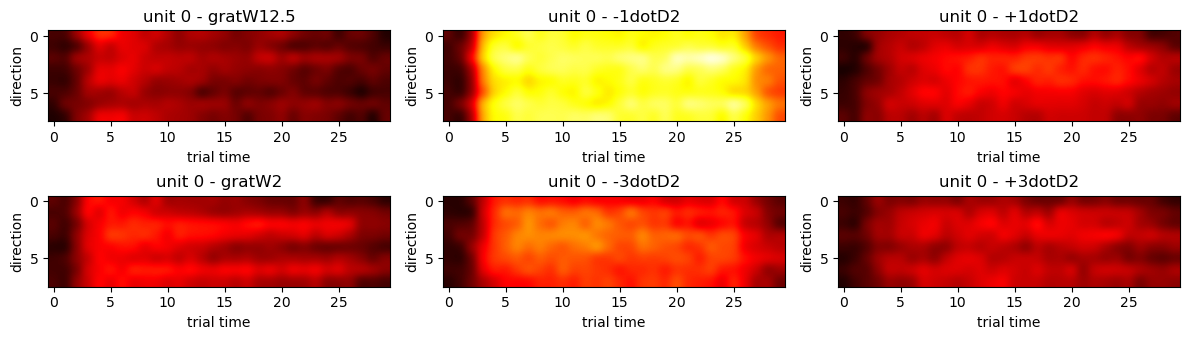

In [77]:
# plot an example 
for ni in [0]:
    print('neuron',ni)
    vmin, vmax = tensorX[ni].min(), tensorX[ni].max()
    f, axes = plt.subplots(len(stimnames)//3, 3, figsize=(4*3, 1.75*len(stimnames)/3))
    for si,sname in enumerate(stimnames):
        ax = axes.ravel(order='F')[si] #fill by columns

        ax.imshow(tensorX[ni,si].reshape(len(dirs),-1,order='F'), cmap='hot', 
                  interpolation='gaussian', vmin=vmin, vmax=vmax)
        ax.set(title=f'unit {ni} - {sname}', ylabel='direction', xlabel='trial time')
    f.tight_layout()
    plt.show()
    

In [ ]:
# # plot one neuron, 1 stimulus, all trial time-courses on top of each other
# # so we can have a feeling for the amount of variability

# ni = 2
# si = 0 # grating dir=0
# with h5py.File(traces_file_path, 'r') as f:
#     # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
#     data = f['dFFdotTraces']
#     all_trials_traces = np.concatenate([f[data[si,session_i]][:,ni,:].T for session_i in range(N_SESSIONS)])
# plt.plot(all_trials_traces.T, lw=.25, c='k');

# plt.plot(all_trials_traces.mean(0), lw=3, c='xkcd:blue');

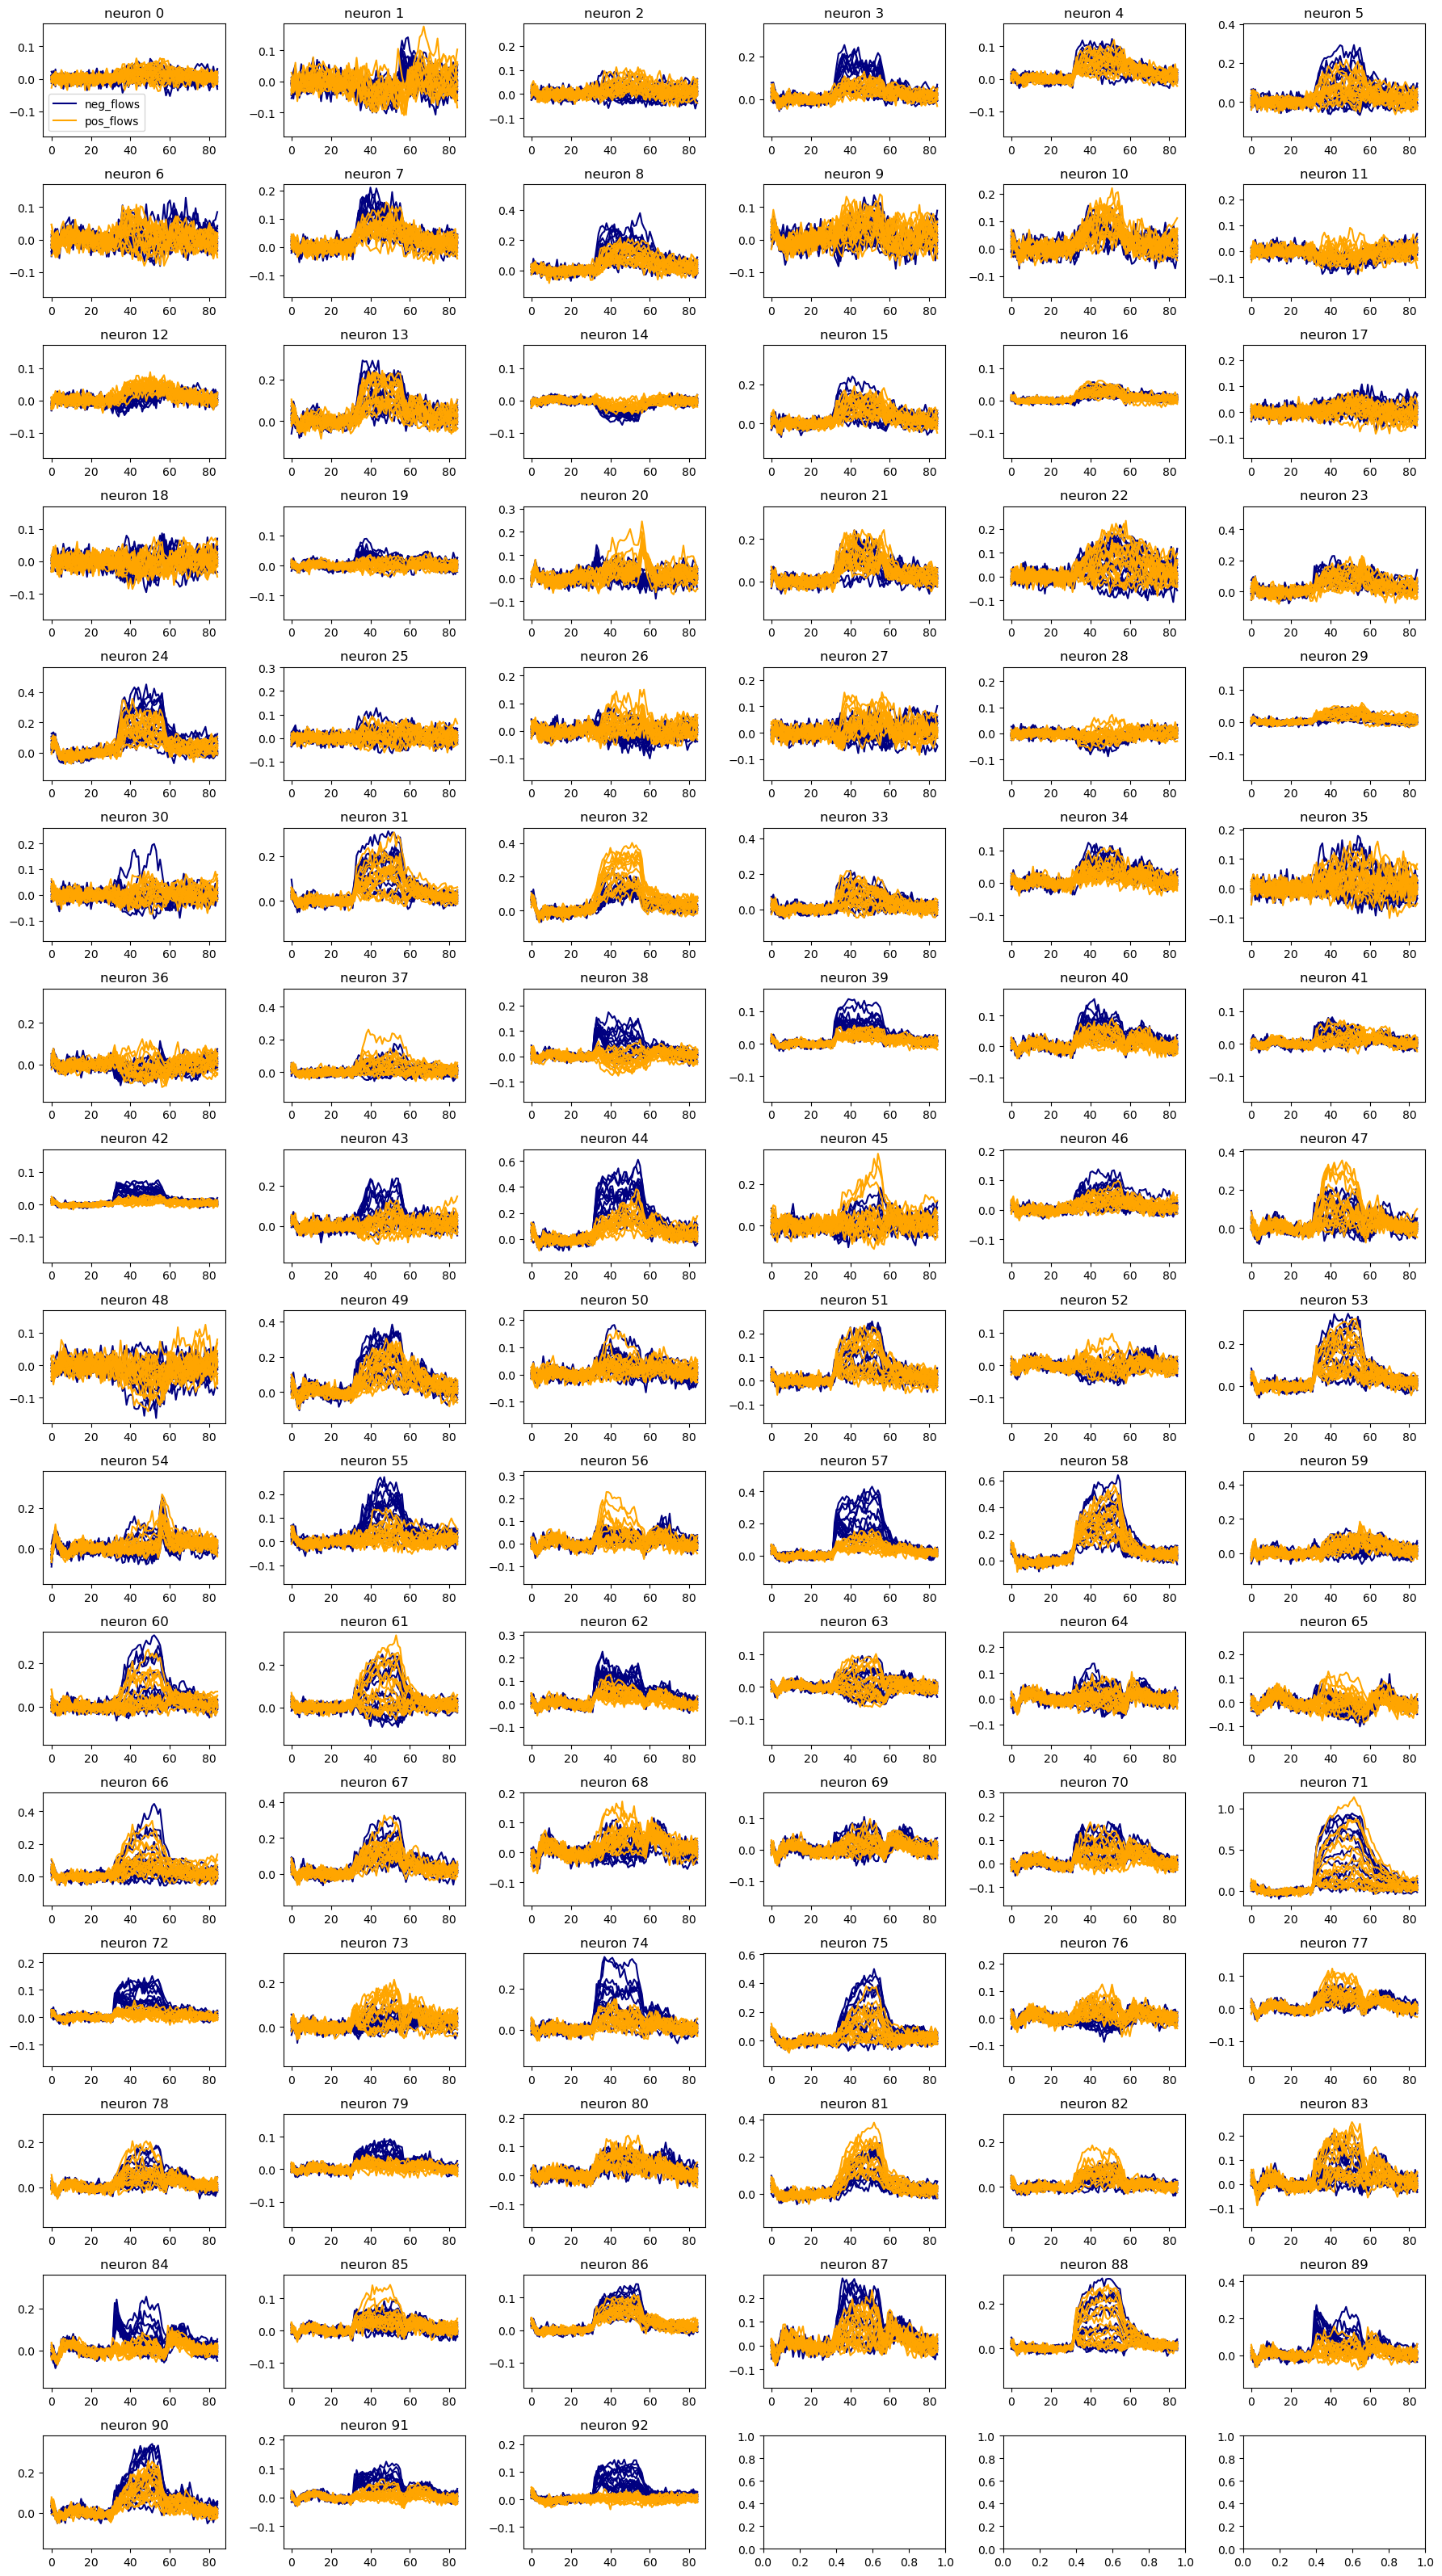

In [14]:
X = tensorX
# pick some stimuli 
stim_is = [[i for i,j in stim_idxs['-3dotD2']], [i for i,j in stim_idxs['+3dotD2']]]
stim_lbls = ['neg_flows','pos_flows']
colors = ['navy','orange']
# f, axes = plt.subplots(1, len(stim_is), figsize=(4*len(stim_is), 3))
# for ax, si in zip(axes, stim_is):

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i,sis in enumerate(stim_is):
        for sii,si in enumerate(sis):
            ax.plot(X[ni, si], color=colors[i], label=stim_lbls[i] if sii == 0 else None)
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()

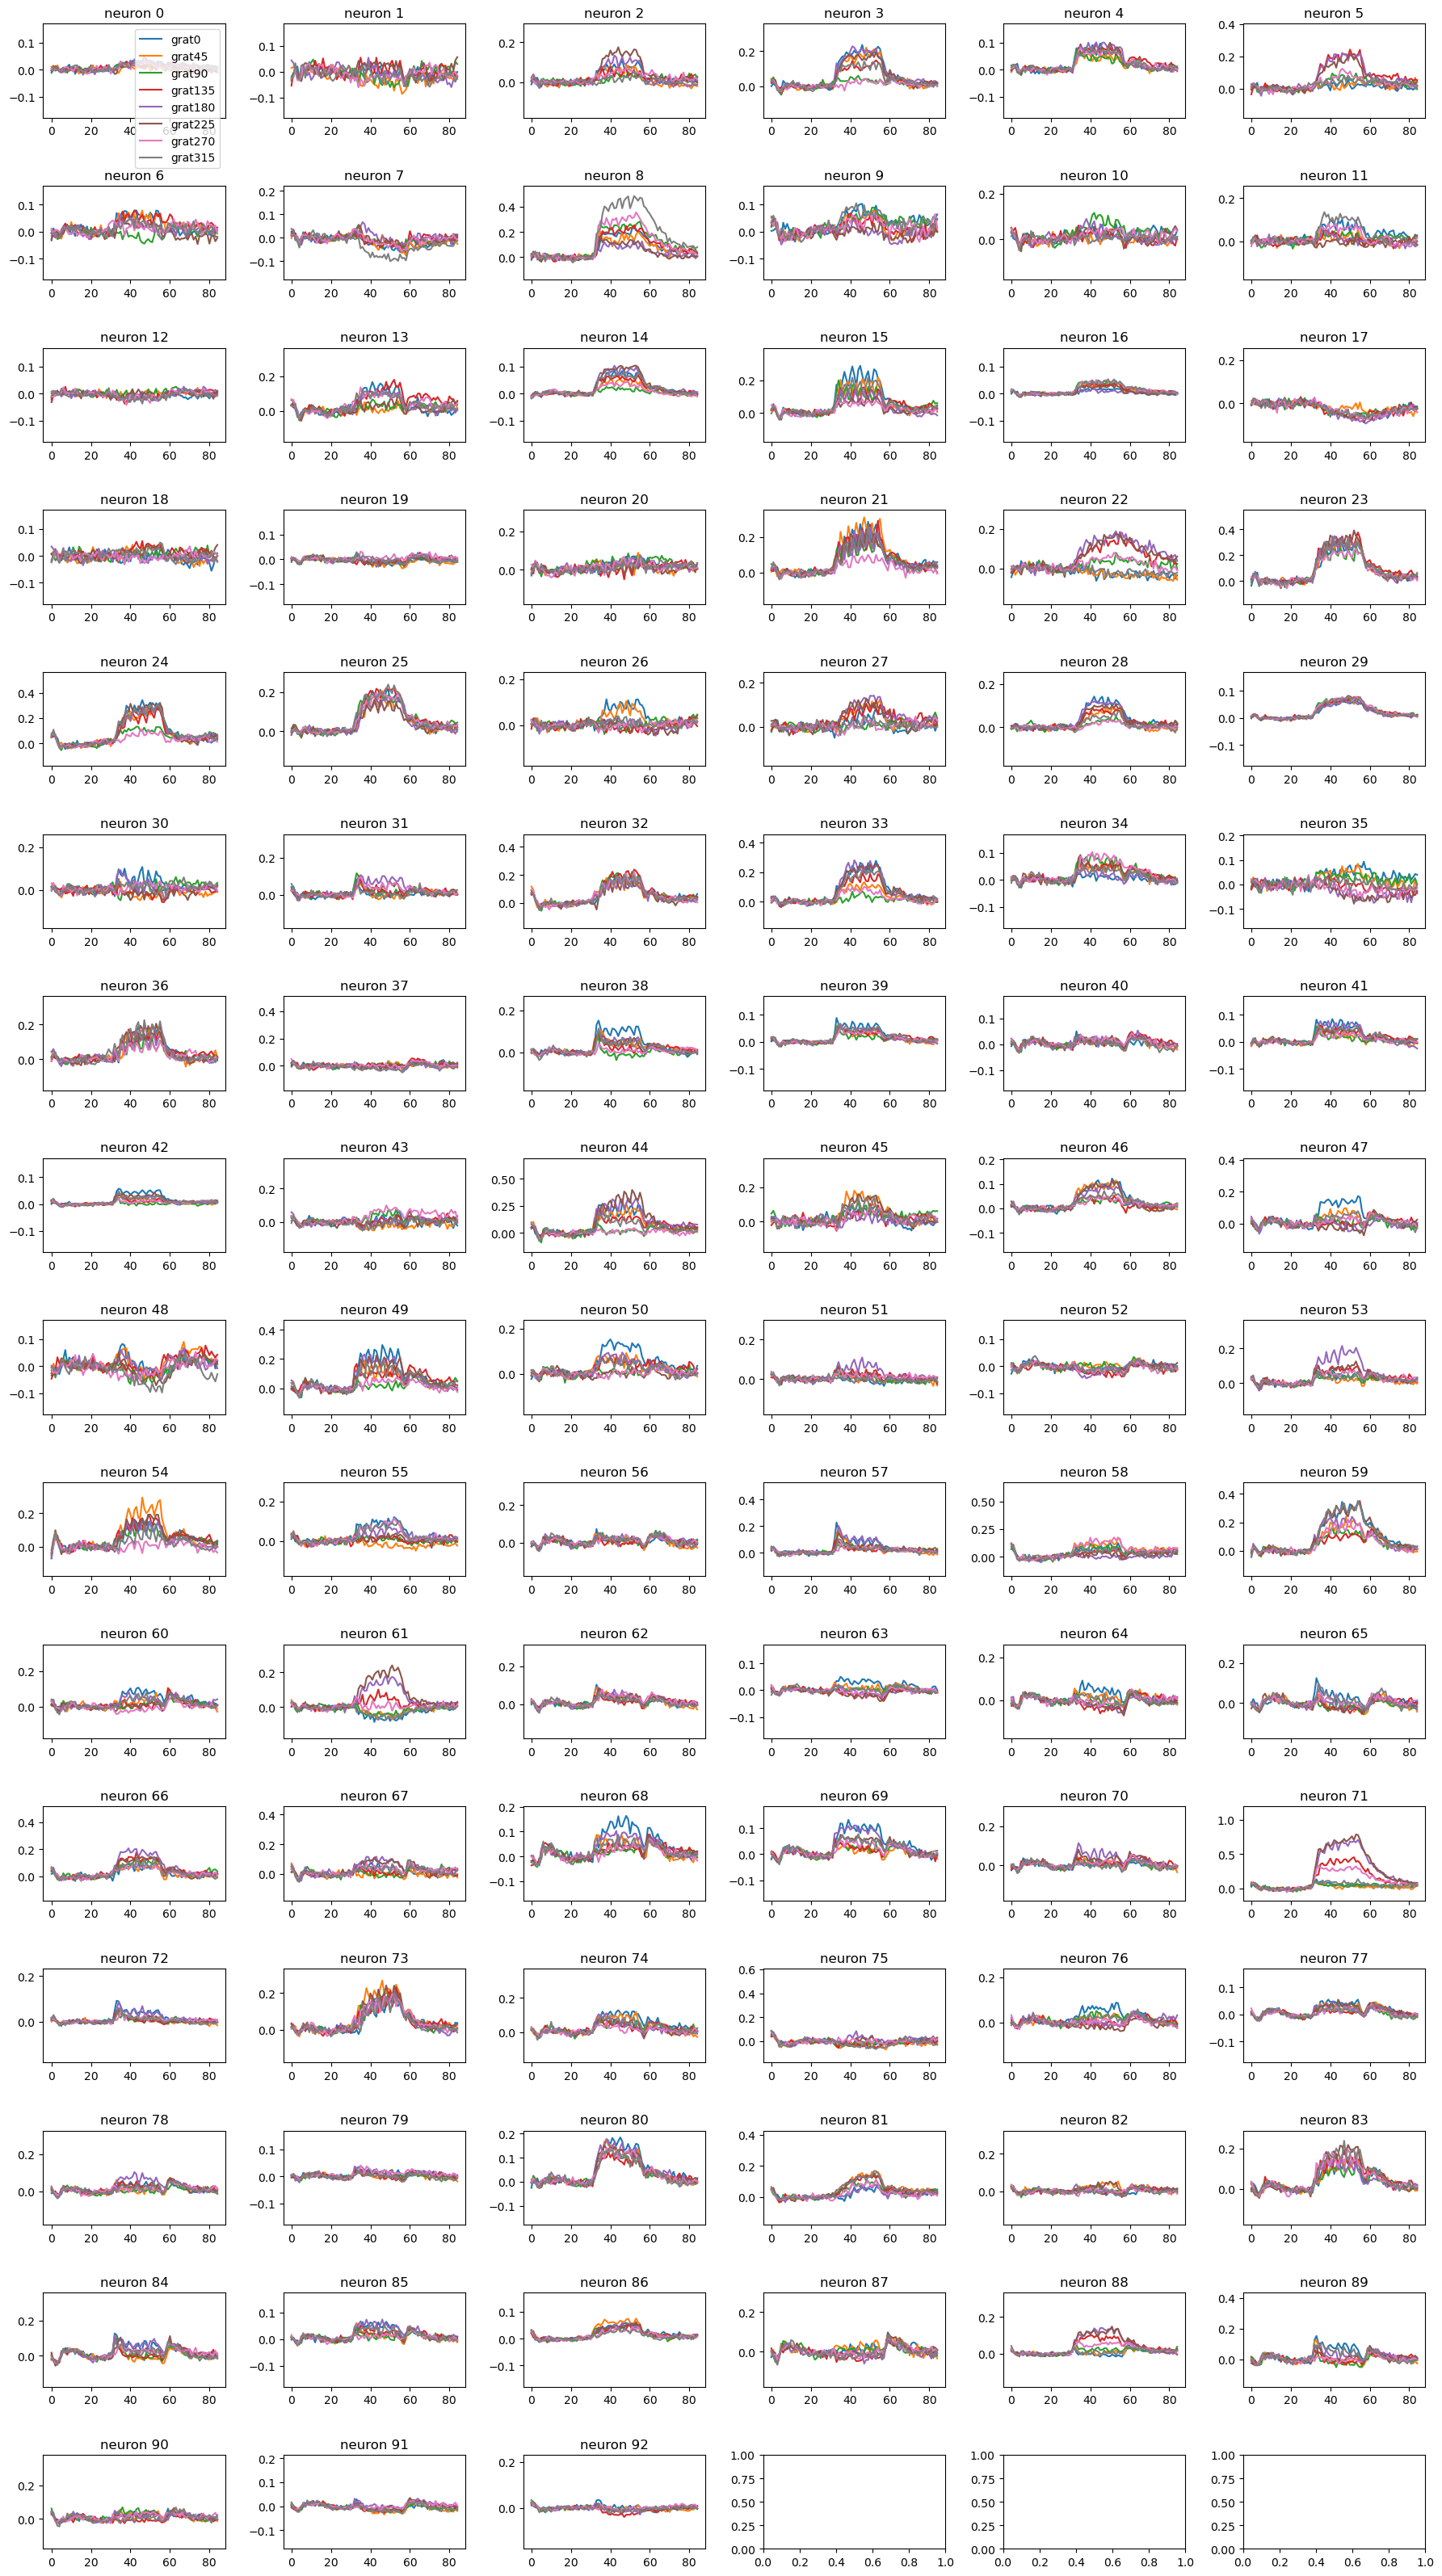

In [19]:
X = tensorX
# pick some stimuli 
stim_is = []
for d in range(0,360,45):
    stim_is.append([i for i,j in stim_idxs['gratW12.5'] if j == str(d)])
stim_lbls = [f'grat{d}' for d in range(0,360,45)]
colors = ['navy','orange']
# f, axes = plt.subplots(1, len(stim_is), figsize=(4*len(stim_is), 3))
# for ax, si in zip(axes, stim_is):

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i,sis in enumerate(stim_is):
        #take the mean of the two instances
        ax.plot(X[ni, sis].mean(0), label=stim_lbls[i])
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()